In [139]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import statistics

In [140]:
def read_data(filename, debug=False):
  # aux_logger_node1 is the 3node, 2hz each, 100 sec test
  f = open(filename, newline='')
  reader = csv.reader(f, delimiter=',')

  delays = []
  bandwidths = []
  full_time = []
  bandwidth_per_second = {}

  # delay items
  delay_per_second = {}

  # fill the parallel arrays
  for row in reader:
    delays.append(float(row[1]))
    bandwidths.append(int(row[2]))
    full_time.append(int(row[3]))

    if debug:
      print(row)

    # get every bandwidth for every unique second out of 100 seconds
    bandwidth_per_second.setdefault(full_time[-1], []).append(bandwidths[-1])
    delay_per_second.setdefault(full_time[-1], []).append(delays[-1])

  # avg bandwidth per second, for the 100 unique seconds
  avg_bandwidth_per_second = {x:sum(y)/len(y) for x,y in bandwidth_per_second.items()}

  # delay metrics for the 100 unique seconds
  min_delay_per_second = {x:min(y) for x,y in delay_per_second.items()}
  max_delay_per_second = {x:max(y) for x,y in delay_per_second.items()}
  median_delay_per_second = {x:statistics.median(y) for x,y in delay_per_second.items()}
  ninetieth_percentile_delay_per_second = {x:np.percentile(y, 90) for x,y in delay_per_second.items()}

  if debug:
    print(f"bps: {bandwidth_per_second}")
    print(f"avg_bps: {avg_bandwidth_per_second}")
    print(f"min_dps: {min_delay_per_second}")
    print(f"max_dps: {max_delay_per_second}")
    print(f"median_dps: {median_delay_per_second}")
    print(f"90th_percentile_dps: {ninetieth_percentile_delay_per_second}")

  
  return avg_bandwidth_per_second, min_delay_per_second, max_delay_per_second, median_delay_per_second, ninetieth_percentile_delay_per_second


In [156]:
# visualize bandwidth data for 3 node context
def plot_bandwidth(x_axis, y_axis):
  plt.plot(x_axis, y_axis)
  plt.title('Bandwidth (Kbps) vs Time (Seconds)')
  plt.xlabel('Time (Seconds)')
  plt.ylabel('Bandwidth (Kbps)')

def plot_delays_overlayed(x_axis, y_axis1, y_axis2, y_axis3, y_axis4):
  plt.plot(x_axis, y_axis1, label="min_delay_per_second")
  plt.plot(x_axis, y_axis2, label="max_delay_per_second")
  plt.plot(x_axis, y_axis3, label="median_delay_per_second")
  plt.plot(x_axis, y_axis4, label="90th_percentile_delay_per_second")
  plt.title('Delay per Second (Seconds) vs Time (Seconds)')
  plt.xlabel('Time (Seconds)')
  plt.ylabel('Delay per Second (Seconds)')
  plt.legend()

def plot_delay(x_axis, y_axis, x_title, y_title, c):
  plt.plot(x_axis, y_axis, color=c)
  plt.title(x_title + " vs " + y_title)
  plt.xlabel(x_title)
  plt.ylabel(y_title)
  

Bandwidth Graph: 3 nodes, 2 Hz each, running for 100 seconds


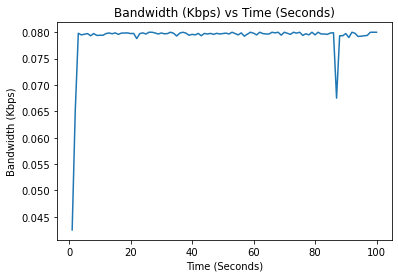

Delay Overlay Graph: 3 nodes, 2 Hz each, running for 100 seconds


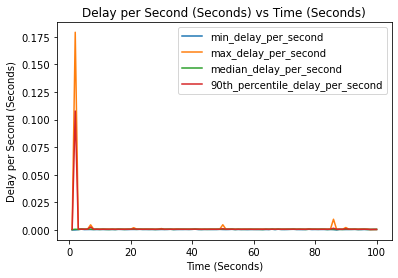

Min Delay Graph: 3 nodes, 2 Hz each, running for 100 seconds


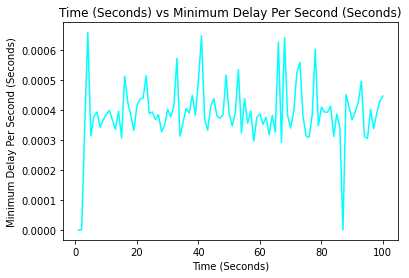

Max Delay Graph: 3 nodes, 2 Hz each, running for 100 seconds


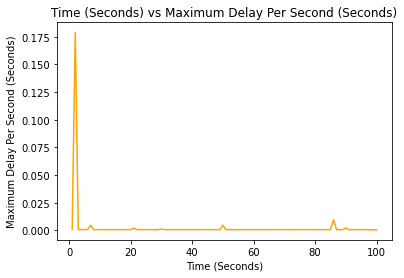

Median Delay Graph: 3 nodes, 2 Hz each, running for 100 seconds


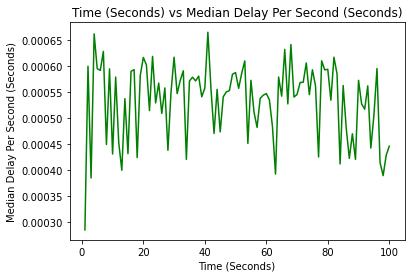

90th Percentile Delay Graph: 3 nodes, 2 Hz each, running for 100 seconds


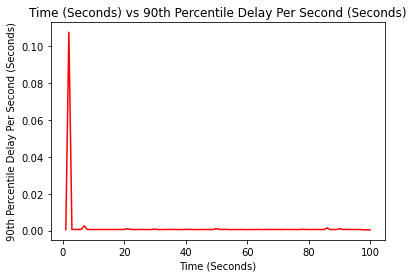

In [160]:
# dataset: 3 nodes, 2 Hz each, running for 100 seconds
(avg_bandwidth_per_second,
 min_delay_per_second, 
 max_delay_per_second, 
 median_delay_per_second, 
 ninetieth_percentile_delay_per_second) = read_data("exp1_data", debug=False)

print("Bandwidth Graph: 3 nodes, 2 Hz each, running for 100 seconds")
avg_kb_per_second = [x / 1000 for x in list(avg_bandwidth_per_second.values())]
plot_bandwidth(list(range(1,101)), avg_kb_per_second)
plt.savefig("exp1_imgs/exp1_bandwidth.jpg")
plt.show()

print("Delay Overlay Graph: 3 nodes, 2 Hz each, running for 100 seconds")
plot_delays_overlayed(list(range(1,101)), 
            list(min_delay_per_second.values()),
            list(max_delay_per_second.values()), 
            list(median_delay_per_second.values()), 
            list(ninetieth_percentile_delay_per_second.values()))
plt.savefig("exp1_imgs/exp1_delay_overlay.jpg")
plt.show()

print("Min Delay Graph: 3 nodes, 2 Hz each, running for 100 seconds")
plot_delay(list(range(1,101)), list(min_delay_per_second.values()), "Time (Seconds)", "Minimum Delay Per Second (Seconds)", c="cyan")
plt.savefig("exp1_imgs/exp1_delay_min.jpg")
plt.show()
print("Max Delay Graph: 3 nodes, 2 Hz each, running for 100 seconds")
plot_delay(list(range(1,101)), list(max_delay_per_second.values()), "Time (Seconds)", "Maximum Delay Per Second (Seconds)", c="orange")
plt.savefig("exp1_imgs/exp1_delay_max.jpg")
plt.show()
print("Median Delay Graph: 3 nodes, 2 Hz each, running for 100 seconds")
plot_delay(list(range(1,101)), list(median_delay_per_second.values()), "Time (Seconds)", "Median Delay Per Second (Seconds)", c="green")
plt.savefig("exp1_imgs/exp1_delay_median.jpg")
plt.show()
print("90th Percentile Delay Graph: 3 nodes, 2 Hz each, running for 100 seconds")
plot_delay(list(range(1,101)), list(ninetieth_percentile_delay_per_second.values()), "Time (Seconds)", "90th Percentile Delay Per Second (Seconds)", c="red")
plt.savefig("exp1_imgs/exp1_delay_90th_percentile.jpg")
plt.show()

Bandwidth Graph: 8 nodes, 5 Hz each, running for 100 seconds


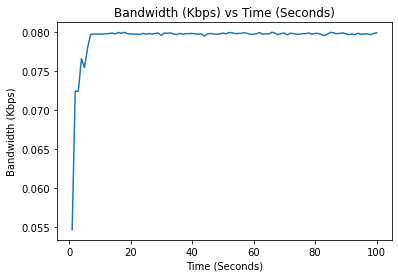

Delay Aggregated Graph: 8 nodes, 5 Hz each, running for 100 seconds


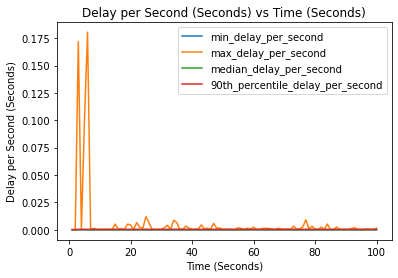

Min Delay Graph: 8 nodes, 5 Hz each, running for 100 seconds


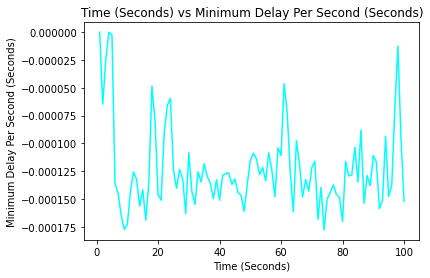

Max Delay Graph: 8 nodes, 5 Hz each, running for 100 seconds


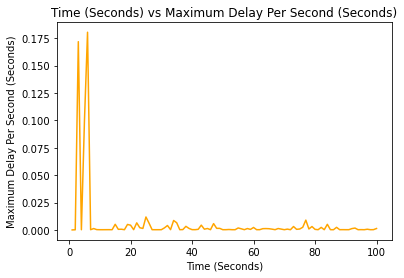

Median Delay Graph: 8 nodes, 5 Hz each, running for 100 seconds


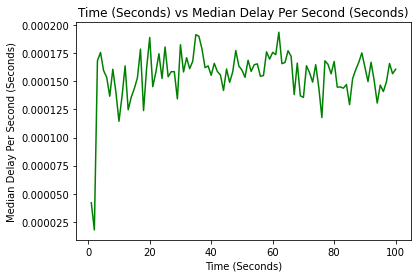

90th Percentile Delay Graph: 8 nodes, 5 Hz each, running for 100 seconds


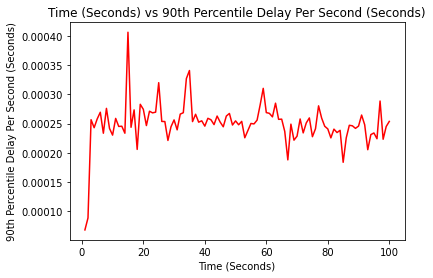

In [161]:
# dataset: 8 nodes, 5 Hz each, running for 100 seconds
(avg_bandwidth_per_second,
 min_delay_per_second, 
 max_delay_per_second, 
 median_delay_per_second, 
 ninetieth_percentile_delay_per_second) = read_data("exp2_data", debug=False)

print("Bandwidth Graph: 8 nodes, 5 Hz each, running for 100 seconds")
avg_kb_per_second = [x / 1000 for x in list(avg_bandwidth_per_second.values())[:-1]]
plot_bandwidth(list(range(1,101)), avg_kb_per_second)
plt.savefig("exp2_imgs/exp2_bandwidth.jpg")
plt.show()

print("Delay Aggregated Graph: 8 nodes, 5 Hz each, running for 100 seconds")
plot_delays_overlayed(list(range(1,101)), 
            list(min_delay_per_second.values())[:-1],
            list(max_delay_per_second.values())[:-1], 
            list(median_delay_per_second.values())[:-1], 
            list(ninetieth_percentile_delay_per_second.values())[:-1])
plt.savefig("exp2_imgs/exp2_delay_overlay.jpg")
plt.show()

print("Min Delay Graph: 8 nodes, 5 Hz each, running for 100 seconds")
plot_delay(list(range(1,101)), list(min_delay_per_second.values())[:-1], "Time (Seconds)", "Minimum Delay Per Second (Seconds)", c="cyan")
plt.savefig("exp2_imgs/exp2_delay_min.jpg")
plt.show()
print("Max Delay Graph: 8 nodes, 5 Hz each, running for 100 seconds")
plot_delay(list(range(1,101)), list(max_delay_per_second.values())[:-1], "Time (Seconds)", "Maximum Delay Per Second (Seconds)", c="orange")
plt.savefig("exp2_imgs/exp2_delay_max.jpg")
plt.show()
print("Median Delay Graph: 8 nodes, 5 Hz each, running for 100 seconds")
plot_delay(list(range(1,101)), list(median_delay_per_second.values())[:-1], "Time (Seconds)", "Median Delay Per Second (Seconds)", c="green")
plt.savefig("exp2_imgs/exp2_delay_median.jpg")
plt.show()
print("90th Percentile Delay Graph: 8 nodes, 5 Hz each, running for 100 seconds")
plot_delay(list(range(1,101)), list(ninetieth_percentile_delay_per_second.values())[:-1], "Time (Seconds)", "90th Percentile Delay Per Second (Seconds)", c="red")
plt.savefig("exp2_imgs/exp2_delay_90th_percentile.jpg")
plt.show()